# Week 2

**==========================================================================================================**

You are a Data Analyst at Elevate Resort. You've received two datasets: a primary dataset containing historical booking information and a smaller dataset with new booking data. Your task is to clean, transform, and visualize the data in Power BI to answer specific business questions.

## Import Libraries

In [1]:
import numpy as np
#from numpy import count_nonzero, median, mean
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("Elevate_Resort_Uncleaned_Dataset.csv")

**==========================================================================================================**

## Data Quick Glance

In [3]:
df.head()

,Booking ID,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_month_code,arrival_date_week_number,arrival_date_day_of_month,Date,stays_in_weekend_nights,stays_in_week_nights,Total night stay,adults,children,babies,meal,Country Code,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled
0,14039,Resort Hotel,342,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,0
1,14038,Resort Hotel,737,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,0
2,48516,Resort Hotel,7,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Direct,0,I,D,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,0
3,27243,Resort Hotel,13,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Corporate,0,I,I,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,0
4,101346,Resort Hotel,14,2015,July,7,27,1,2015-07-01 00:00:00,0,2,2,2,0.00,0,BB,GBR,Online TA,0,I,I,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118987 entries, 0 to 118986
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Booking ID                   118987 non-null  int64  
 1   hotel                        118987 non-null  object 
 2   lead_time                    118987 non-null  int64  
 3   arrival_date_year            118987 non-null  int64  
 4   arrival_date_month           118987 non-null  object 
 5   arrival_month_code           118987 non-null  int64  
 6   arrival_date_week_number     118987 non-null  int64  
 7   arrival_date_day_of_month    118987 non-null  int64  
 8   Date                         118987 non-null  object 
 9   stays_in_weekend_nights      118987 non-null  int64  
 10  stays_in_week_nights         118987 non-null  int64  
 11  Total night stay             118987 non-null  int64  
 12  adults                       118987 non-null  int64  
 13 

In [5]:
df.dtypes.value_counts()

int64      17
object     12
float64     2
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,Booking ID,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_month_code,arrival_date_week_number,arrival_date_day_of_month,Date,stays_in_weekend_nights,stays_in_week_nights,Total night stay,adults,children,babies,meal,Country Code,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled
count,118987.00,118987,118987.00,118987.00,118987,118987.00,118987.00,118987.00,118987,118987.00,118987.00,118987.00,118987.00,118933.00,118987.00,118987,118460,118987,118987.00,118987,118987,118987.00,118987,102732,118987.00,118987,118987.00,118987.00,118987.00,118987,118987.00
unique,NaN,2,NaN,NaN,12,NaN,NaN,NaN,793,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,NaN,10,11,NaN,3,334,NaN,4,NaN,NaN,NaN,3,NaN
top,NaN,City Hotel,NaN,NaN,August,NaN,NaN,NaN,2015-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,NaN,A,A,NaN,No Deposit,9,NaN,Transient,NaN,NaN,NaN,Check-Out,NaN
freq,NaN,78940,NaN,NaN,13829,NaN,NaN,NaN,448,NaN,NaN,NaN,NaN,NaN,NaN,92020,48421,56221,NaN,84079,72625,NaN,104238,31732,NaN,89337,NaN,NaN,NaN,74872,NaN
mean,59705.30,NaN,103.97,2016.16,NaN,6.55,27.16,15.80,NaN,0.93,2.50,3.43,1.86,0.10,0.01,NaN,NaN,NaN,0.03,NaN,NaN,0.22,NaN,NaN,2.33,NaN,101.55,0.06,0.57,NaN,0.27
std,34476.47,NaN,106.98,0.71,NaN,3.09,13.60,8.78,NaN,1.00,1.90,2.54,0.57,0.39,0.10,NaN,NaN,NaN,0.17,NaN,NaN,0.64,NaN,NaN,17.61,NaN,55.26,0.25,0.79,NaN,0.44
min,1.00,NaN,-468.00,2015.00,NaN,1.00,1.00,1.00,NaN,0.00,0.00,0.00,1.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,-999.00,0.00,0.00,NaN,0.00
25%,29836.50,NaN,18.00,2016.00,NaN,4.00,16.00,8.00,NaN,0.00,1.00,2.00,2.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,69.47,0.00,0.00,NaN,0.00
50%,59702.00,NaN,69.00,2016.00,NaN,7.00,28.00,16.00,NaN,1.00,2.00,3.00,2.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,94.95,0.00,0.00,NaN,0.00
75%,89573.50,NaN,160.00,2017.00,NaN,9.00,38.00,23.00,NaN,2.00,3.00,4.00,2.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,126.00,0.00,1.00,NaN,1.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,Booking ID,lead_time,arrival_date_year,arrival_month_code,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,Total night stay,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_cancelled
count,118987.00,118987.00,118987.00,118987.00,118987.00,118987.00,118987.00,118987.00,118987.00,118987.00,118933.00,118987.00,118987.00,118987.00,118987.00,118987.00,118987.00,118987.00,118987.00
mean,59705.30,103.97,2016.16,6.55,27.16,15.80,0.93,2.50,3.43,1.86,0.10,0.01,0.03,0.22,2.33,101.55,0.06,0.57,0.27
std,34476.47,106.98,0.71,3.09,13.60,8.78,1.00,1.90,2.54,0.57,0.39,0.10,0.17,0.64,17.61,55.26,0.25,0.79,0.44
min,1.00,-468.00,2015.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-999.00,0.00,0.00,0.00
25%,29836.50,18.00,2016.00,4.00,16.00,8.00,0.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,69.47,0.00,0.00,0.00
50%,59702.00,69.00,2016.00,7.00,28.00,16.00,1.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,94.95,0.00,0.00,0.00
75%,89573.50,160.00,2017.00,9.00,38.00,23.00,2.00,3.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,126.00,0.00,1.00,1.00
max,119390.00,737.00,2017.00,12.00,53.00,31.00,19.00,50.00,69.00,55.00,10.00,10.00,1.00,18.00,391.00,5400.00,8.00,5.00,1.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,hotel,arrival_date_month,Date,meal,Country Code,market_segment,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status
count,118987,118987,118987,118987,118460,118987,118987,118987,118987,102732,118987,118987
unique,2,12,793,5,177,8,10,11,3,334,4,3
top,City Hotel,August,2015-12-05 00:00:00,BB,PRT,Online TA,A,A,No Deposit,9,Transient,Check-Out
freq,78940,13829,448,92020,48421,56221,84079,72625,104238,31732,89337,74872


In [9]:
df.columns

Index(['Booking ID', 'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_month_code', 'arrival_date_week_number', 'arrival_date_day_of_month', 'Date ', 'stays_in_weekend_nights', 'stays_in_week_nights', 'Total night stay', 'adults', 'children', 'babies', 'meal', 'Country Code', 'market_segment', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'is_cancelled'], dtype='object')

In [10]:
df.shape

(118987, 31)

In [11]:
df.isnull().sum()

Booking ID                         0
hotel                              0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_month_code                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
Date                               0
stays_in_weekend_nights            0
stays_in_week_nights               0
Total night stay                   0
adults                             0
children                          54
babies                             0
meal                               0
Country Code                     527
market_segment                     0
is_repeated_guest                  0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
agent                          16255
days_in_waiting_list               0
customer_type                      0
adr                                0
r

In [12]:
df.fillna(0, inplace=True)

In [13]:
df.duplicated().sum()

0

What is the average lead time of the bookings? Hint: You must clean the main dataset's “lead_time” column. Examine the column and correct any anomalies you find.

In [14]:
df.lead_time.value_counts()

 0      6258
 1      3437
 2      2065
 3      1810
 4      1710
        ... 
 387       1
-182       1
-226       1
-87        1
-12        1
Name: lead_time, Length: 518, dtype: int64

In [15]:
df.lead_time.describe()

count   118987.00
mean       103.97
std        106.98
min       -468.00
25%         18.00
50%         69.00
75%        160.00
max        737.00
Name: lead_time, dtype: float64

In [16]:
df2 = df[df.lead_time >=0]

df2.head()

,Booking ID,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_month_code,arrival_date_week_number,arrival_date_day_of_month,Date,stays_in_weekend_nights,stays_in_week_nights,Total night stay,adults,children,babies,meal,Country Code,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled
0,14039,Resort Hotel,342,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,0
1,14038,Resort Hotel,737,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,0
2,48516,Resort Hotel,7,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Direct,0,I,D,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,0
3,27243,Resort Hotel,13,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Corporate,0,I,I,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,0
4,101346,Resort Hotel,14,2015,July,7,27,1,2015-07-01 00:00:00,0,2,2,2,0.00,0,BB,GBR,Online TA,0,I,I,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,0


In [17]:
df2.lead_time.mean()

104.06521885352032

Question 8

You are a Data Analyst at Elevate Resort, and you have been assigned to understand the distribution of bookings among various agents. This is crucial for the upcoming quarterly meeting, where strategies for partnerships and commissions will be discussed. Your task is to clean the agent column by removing null values and then create a histogram in Power BI to visualize the frequency distribution of bookings among different agents.

What is the appropriate way to remove null values from the agent column in Power BI?

In [18]:
df.head()

,Booking ID,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_month_code,arrival_date_week_number,arrival_date_day_of_month,Date,stays_in_weekend_nights,stays_in_week_nights,Total night stay,adults,children,babies,meal,Country Code,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled
0,14039,Resort Hotel,342,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,0
1,14038,Resort Hotel,737,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,0
2,48516,Resort Hotel,7,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Direct,0,I,D,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,0
3,27243,Resort Hotel,13,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Corporate,0,I,I,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,0
4,101346,Resort Hotel,14,2015,July,7,27,1,2015-07-01 00:00:00,0,2,2,2,0.00,0,BB,GBR,Online TA,0,I,I,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,0


In [19]:
df.agent.value_counts()

9      31732
0      16255
240    13913
1       7184
14      3616
       ...  
265        1
93         1
294        1
431        1
433        1
Name: agent, Length: 335, dtype: int64

In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
df.shape

(118987, 31)

Question 9

Using the cleaned agent column, create a stacked column chart in Power BI that visualizes the sum of booking ID by agent. 

Which agent had the highest number of bookings?

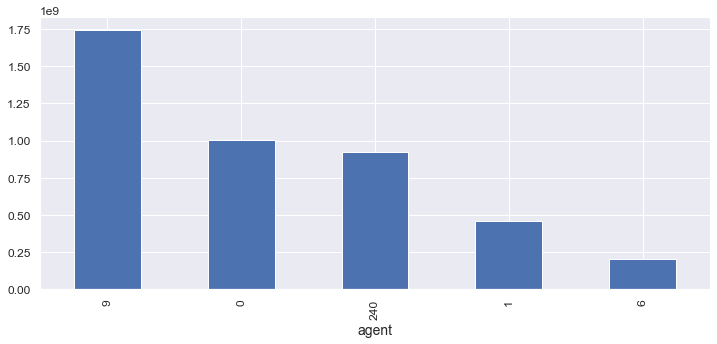

In [22]:
df.groupby("agent")["Booking ID"].sum().nlargest().plot(kind = "bar", figsize = (12,5), fontsize = 12)
plt.show()

As part of the upcoming fiscal year planning, the management team at Elevate Resort wants a comprehensive view of bookings across all years. A new dataset containing updated bookings has been provided to you. Before diving into any analysis, it's crucial to append this new dataset to the existing one to ensure that your data is up to date.

Your challenge is to append the new dataset to your existing dataset, ensuring that all data is consistent and up-to-date for the upcoming strategic planning meeting.

After appending the new dataset to your existing dataset, create a clustered column chart in Power BI to display the number of bookings for the Resort Hotel across different years.

Based on the combined dataset, which year shows the highest number of bookings for the Resort Hotel?


In [23]:
df2 = pd.read_csv("Elevate_Resort_To_Append_Dataset.csv")

In [24]:
df2.head()

,Booking ID,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_month_code,arrival_date_week_number,arrival_date_day_of_month,Date,stays_in_weekend_nights,stays_in_week_nights,Total night stay,adults,children,babies,meal,Country Code,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled
0,70754,City Hotel,68,2017,June,6,27,27,2016-06-27 00:00:00,1,1,2,2,2,0,BB,FRA,Online TA,0,F,F,1,No Deposit,9.00,0,Transient,198.99,0,2,Check-Out,0
1,82552,Resort Hotel,10,2017,September,9,40,30,2016-09-30 00:00:00,0,1,1,1,0,0,BB,USA,Online TA,0,D,D,0,No Deposit,240.00,0,Transient,149.60,1,1,Check-Out,0
2,46283,City Hotel,114,2017,April,4,16,15,2016-04-15 00:00:00,2,2,4,2,0,0,BB,ITA,Online TA,0,A,A,0,No Deposit,9.00,0,Transient,84.15,0,1,Canceled,1
3,3308,City Hotel,35,2017,July,7,31,29,2016-07-29 00:00:00,0,1,1,2,0,0,BB,PRT,Online TA,0,A,A,0,No Deposit,9.00,0,Transient,111.10,0,1,Check-Out,0
4,102303,Resort Hotel,35,2016,July,7,30,24,2015-07-24 00:00:00,2,6,8,2,0,0,BB,PRT,Direct,0,D,D,0,No Deposit,240.00,0,Transient,169.40,0,2,Check-Out,0


In [25]:
df.head()

,Booking ID,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_month_code,arrival_date_week_number,arrival_date_day_of_month,Date,stays_in_weekend_nights,stays_in_week_nights,Total night stay,adults,children,babies,meal,Country Code,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled
0,14039,Resort Hotel,342,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,0
1,14038,Resort Hotel,737,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,0
2,48516,Resort Hotel,7,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Direct,0,I,D,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,0
3,27243,Resort Hotel,13,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Corporate,0,I,I,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,0
4,101346,Resort Hotel,14,2015,July,7,27,1,2015-07-01 00:00:00,0,2,2,2,0.00,0,BB,GBR,Online TA,0,I,I,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,0


In [26]:
df3 = pd.concat([df,df2], axis=0, ignore_index=True)

In [27]:
df3

,Booking ID,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_month_code,arrival_date_week_number,arrival_date_day_of_month,Date,stays_in_weekend_nights,stays_in_week_nights,Total night stay,adults,children,babies,meal,Country Code,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled
0,14039,Resort Hotel,342,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,0
1,14038,Resort Hotel,737,2015,July,7,27,1,2015-07-01 00:00:00,0,0,0,2,0.00,0,BB,PRT,Direct,0,D,D,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,0
2,48516,Resort Hotel,7,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Direct,0,I,D,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,0
3,27243,Resort Hotel,13,2015,July,7,27,1,2015-07-01 00:00:00,0,1,1,1,0.00,0,BB,GBR,Corporate,0,I,I,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,0
4,101346,Resort Hotel,14,2015,July,7,27,1,2015-07-01 00:00:00,0,2,2,2,0.00,0,BB,GBR,Online TA,0,I,I,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119182,76750,City Hotel,45,2018,February,2,7,13,2017-02-13 00:00:00,1,3,4,2,1.00,0,BB,FRA,Online TA,0,A,A,0,No Deposit,9.00,0,Transient,114.07,0,0,Canceled,1
119183,43698,City Hotel,184,2018,June,6,22,1,2017-06-01 00:00:00,0,2,2,2,0.00,0,BB,PRT,Groups,0,A,A,0,Non Refund,58.00,0,Transient,110.00,0,0,Canceled,0
119184,30868,City Hotel,76,2016,October,10,41,9,2015-10-09 00:00:00,1,2,3,2,0.00,0,BB,PRT,Offline TA/TO,0,A,A,0,No Deposit,21.00,0,Transient-Party,82.50,0,0,Canceled,1
119185,39812,Resort Hotel,128,2016,July,7,31,29,2015-07-29 00:00:00,1,4,5,2,0.00,0,HB,PRT,Online TA,0,G,G,1,No Deposit,240.00,0,Transient,204.60,0,2,Canceled,1


In [28]:
df3.columns

Index(['Booking ID', 'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_month_code', 'arrival_date_week_number', 'arrival_date_day_of_month', 'Date ', 'stays_in_weekend_nights', 'stays_in_week_nights', 'Total night stay', 'adults', 'children', 'babies', 'meal', 'Country Code', 'market_segment', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'is_cancelled'], dtype='object')

In [29]:
df3.groupby(['arrival_date_year','is_cancelled'])['Booking ID'].count()

arrival_date_year  is_cancelled
2015               0               16845
                   1                5107
2016               0               41769
                   1               14752
2017               0               28339
                   1               12314
2018               0                  46
                   1                  15
Name: Booking ID, dtype: int64

**==========================================================================================================**

**==========================================================================================================**

#### Python code done by Dennis Lam